In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
props = pd.read_csv('props_train.csv',low_memory=False)
props_filtered = props.loc[:, (props.columns != "price_aprox_usd") & (props.columns != "currency") &  (props.columns != "property_type") & (props.columns != "place_name") & (props.columns != "state_name") ]
props_filtered.fillna(value = 0 , inplace="True")
props_filtered.head()

,expenses,floor,lat,lon,price,price_aprox_local_currency,price_per_m2,price_usd_per_m2,rooms,surface_covered_in_m2,surface_in_m2,surface_total_in_m2
0,0.0,0.0,-34.661824,-58.508839,62000.0,1093959.0,1550.000000,1127.272727,0.0,40.0,0.0,55.0
1,0.0,0.0,-34.652262,-58.522982,72000.0,1270404.0,1309.090909,1309.090909,0.0,55.0,0.0,55.0
2,0.0,0.0,-38.002626,-57.549447,64000.0,1129248.0,1828.571429,1828.571429,0.0,35.0,0.0,35.0
3,0.0,0.0,-34.532957,-58.521782,130000.0,2293785.0,1666.666667,1226.415094,0.0,78.0,0.0,106.0
4,0.0,0.0,-34.559873,-58.443362,138000.0,2434941.0,3450.000000,3066.666667,0.0,40.0,0.0,45.0


In [23]:
X = props_filtered
y = props["price_aprox_usd"]
X.shape

(990042, 12)

In [24]:
props_filtered.dtypes

expenses                      float64
floor                         float64
lat                           float64
lon                           float64
price                         float64
price_aprox_local_currency    float64
price_per_m2                  float64
price_usd_per_m2              float64
rooms                         float64
surface_covered_in_m2         float64
surface_in_m2                 float64
surface_total_in_m2           float64
dtype: object

In [25]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(792033, 12) (792033,)
(198009, 12) (198009,)


In [26]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [27]:
predictions = lm.predict(X_test)
print(predictions)[0:5]

[ 145015.28492201   72896.01347829  202306.74594006  115648.96213216
   79382.28327707]


In [28]:
lm.score(X,y)

0.8873077527723221

In [17]:
lm.coef_

array([  5.18532995e+01,   2.44774063e+02,  -2.81478866e+02,
         1.01268647e-01,   6.11292766e-02,  -9.86175627e+00,
         1.02331984e+01,   7.53649267e+03,  -1.81149104e+01,
         1.12504630e+02,  -3.79894251e+00])

In [18]:
lm.intercept_

888.87947151559638

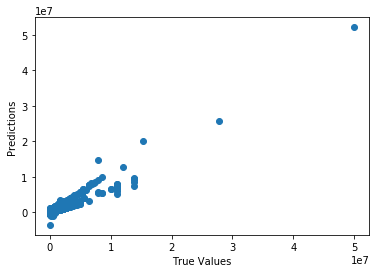

In [29]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [20]:
print "Score:", model.score(X_test, y_test)

Score: 0.866533862354
